In [1]:
from sklearn.datasets import make_regression
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

Coefficients: [49.82930935]
Intercept: 3.4953459615809184


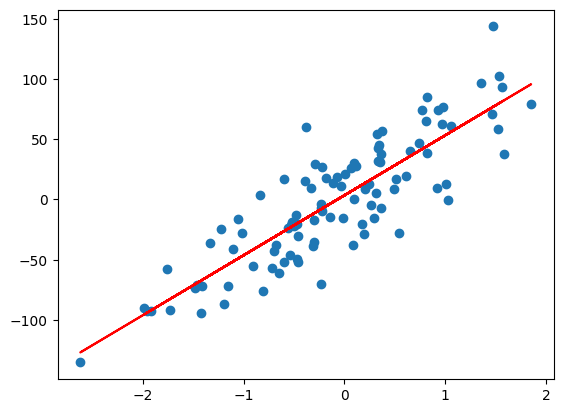

In [2]:
X, y = make_regression(n_samples=100, n_features=1, noise=30, random_state=42)

# Apply OLS
ols = LinearRegression()
ols.fit(X, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
print(f'Coefficients: {ols.coef_}')
print(f'Intercept: {ols.intercept_}')

# Draw Regression line in the plot before
fig, ax= plt.subplots()

ax.scatter(X, y) 
ax.plot(X, ols.predict(X), color='red')
fig.show()

In [3]:
print(X.ravel().shape)

(100,)


Epoch 0: b = 0.06988758436629615, m = 49.8128944435235
Slope Grad: 0.710555647650439, Intercept Grad: -6.988758436629615
Epoch 1: b = 0.13836265929938174, m = 49.806051608123795
Slope Grad: 0.6842835399704866, Intercept Grad: -6.847507493308559
Epoch 2: b = 0.20545402064129842, m = 49.799464213101174
Slope Grad: 0.6587395022621226, Intercept Grad: -6.7091361341916675
Epoch 3: b = 0.27118987319574084, m = 49.79312515803025
Slope Grad: 0.6339055070921237, Intercept Grad: -6.573585255444239
Epoch 4: b = 0.3355978429232407, m = 49.78702751854959
Slope Grad: 0.6097639480659898, Intercept Grad: -6.440796972749983
Epoch 5: b = 0.3987049888837027, m = 49.78116454224631
Slope Grad: 0.5862976303285574, Intercept Grad: -6.3107145960462026
Epoch 6: b = 0.4605378149315422, m = 49.775529644633565
Slope Grad: 0.5634897612741863, Intercept Grad: -6.183282604783952
Epoch 7: b = 0.5211222811685658, m = 49.77011640521894
Slope Grad: 0.5413239414621229, Intercept Grad: -6.058446623702366
Epoch 8: b = 0.58

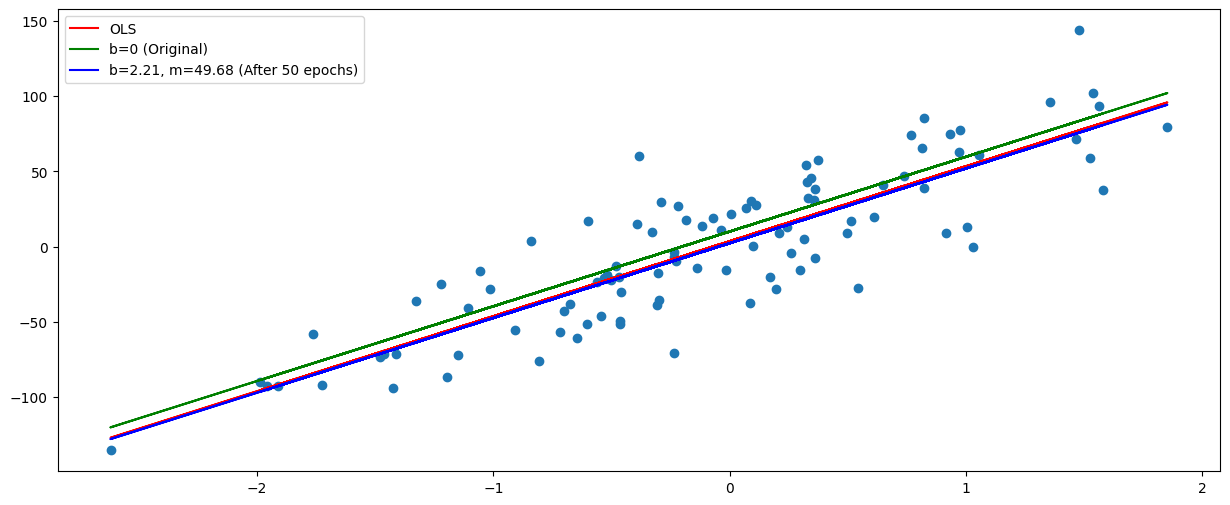

In [4]:
# Apply Gradient Descent
m = 49.82
b = 0 # Starting the intercept from 0

learning_rate = 0.01
epochs = 50
for i in range(epochs):
    # Calculate the slope and intercept gradients
    slope_grad = -2 * np.sum(X.ravel() * (y.ravel() - (m*X.ravel() + b))) / len(X)
    intercept_grad = -2 * np.sum(y.ravel() - (m*X.ravel() + b)) / len(X)
    
    m = m - learning_rate * slope_grad
    b = b - learning_rate * intercept_grad
    
    print(f'Epoch {i}: b = {b}, m = {m}')
    print(f'Slope Grad: {slope_grad}, Intercept Grad: {intercept_grad}')

random_line = m*X + 10
y_pred = m*X + b
fig, ax= plt.subplots(figsize=(15, 6))

ax.scatter(X, y) 
ax.plot(X, ols.predict(X), color='red', label = 'OLS')
ax.plot(X, random_line, color='green', label = f'b=0 (Original)')
ax.plot(X, y_pred, color='blue', label = f'b={b:.2f}, m={m:.2f} (After {epochs} epochs)')
ax.legend()
fig.show()

In [5]:
# Making same using a loop 

m = 49.82

b = -100
epochs = 500
learning_rate = -0.001

for i in range(epochs):
    error_func_slope = -2 * np.sum((y - (m*X.ravel() - b)))
    b = b - learning_rate * error_func_slope
    print(f'Epoch {i}: b = {b}')
    print(f'Slope: {error_func_slope}')

Epoch 0: b = -80.69887584366296
Slope: 19301.12415633704
Epoch 1: b = -65.25797651859332
Slope: 15440.89932506963
Epoch 2: b = -52.905257058537615
Slope: 12352.719460055705
Epoch 3: b = -43.023081490493055
Slope: 9882.175568044562
Epoch 4: b = -35.11734103605741
Slope: 7905.740454435648
Epoch 5: b = -28.79274867250889
Slope: 6324.592363548521
Epoch 6: b = -23.733074781670073
Slope: 5059.673890838815
Epoch 7: b = -19.68533566899902
Slope: 4047.7391126710527
Epoch 8: b = -16.447144378862177
Slope: 3238.1912901368423
Epoch 9: b = -13.856591346752705
Slope: 2590.553032109473
Epoch 10: b = -11.784148921065125
Slope: 2072.44242568758
Epoch 11: b = -10.126194980515061
Slope: 1657.9539405500632
Epoch 12: b = -8.79983182807501
Slope: 1326.3631524400512
Epoch 13: b = -7.73874130612297
Slope: 1061.090521952041
Epoch 14: b = -6.889868888561337
Slope: 848.8724175616325
Epoch 15: b = -6.210770954512031
Slope: 679.097934049306
Epoch 16: b = -5.667492607272587
Slope: 543.2783472394447
Epoch 17: b = -5

In [6]:
# Creating a class for gradient descent

class GradientDescent:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def train(self, X, y):
        m = 49.82 # Taking the slope to be constant
        b = -100
        for i in range(self.epochs):
            error_func_slope = -2 * np.sum((y - (m*X.ravel() - b)))
            b = b - self.learning_rate * error_func_slope
        return m, b
    
gd = GradientDescent(learning_rate=-0.001, epochs=5000)
m, b = gd.train(X, y)
print(f'm = {m}')
print(f'b = {b}')
# 3.4953459615809184

m = 49.82
b = -3.494379218314809


In [7]:
# Now m is also variable 
m_var = 3       # Choosing a random m
b_var = 10     # Choosing a random b

epochs = 1000
learning_rate_m = 0.0001
learning_rate_b = 0.001

for i in range(epochs):
    error_func_slope_m = -2 * np.sum((y - (m_var*X.ravel() - b_var)))
    error_func_slope_b = -2 * np.sum((y - (m_var*X.ravel() - b_var)))
    
    m_var = m_var - learning_rate_m * error_func_slope_m
    b_var = b_var - learning_rate_b * error_func_slope_b
    
    #print(f'Epoch {i}: m = {m_var}, b = {b_var}')   
    print(f'Slope m: {error_func_slope_m}, Slope b: {error_func_slope_b}')
    

Slope m: -1726.4570547846668, Slope b: -1726.4570547846668
Slope m: -2075.3341967929973, Slope b: -2075.3341967929973
Slope m: -2494.711360726913, Slope b: -2494.711360726913
Slope m: -2998.8349746065956, Slope b: -2998.8349746065956
Slope m: -3604.830340894965, Slope b: -3604.830340894965
Slope m: -4333.283390607928, Slope b: -4333.283390607928
Slope m: -5208.93999650944, Slope b: -5208.93999650944
Slope m: -6261.546601370374, Slope b: -6261.546601370374
Slope m: -7526.860717805511, Slope b: -7526.860717805511
Slope m: -9047.865626815703, Slope b: -9047.865626815703
Slope m: -10876.230538882734, Slope b: -10876.230538882734
Slope m: -13074.065819936048, Slope b: -13074.065819936048
Slope m: -15716.032907994888, Slope b: -15716.032907994888
Slope m: -18891.88059528879, Slope b: -18891.88059528879
Slope m: -22709.493834483463, Slope b: -22709.493834483463
Slope m: -27298.55863831003, Slope b: -27298.55863831003
Slope m: -32814.96757086137, Slope b: -32814.96757086137
Slope m: -39446.115

### Implementing Batch Gradient Descent For Multi Columns Datasets

In [8]:
from sklearn.datasets import load_diabetes
import numpy as np 
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [9]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [10]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print(f'Coefficients: {reg.coef_}')
print(f'Intercept: {reg.intercept_}')
print(f'MSE: {mean_squared_error(y_test, reg.predict(X_test))}')
print(f'R2: {r2_score(y_test, reg.predict(X_test))}')

Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Intercept: 151.34560453985995
MSE: 2900.19362849348
R2: 0.4526027629719197


In [13]:
print(X.shape)
x = np.ones(X.shape[1])
print(x.shape)

(442, 10)
(10,)


In [14]:
print(X_train.shape)

(353, 10)


In [17]:
class GradientDescent_Multi_Regression:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def fit(self, X_train, y_train):
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        
        for i in range(self.epochs):
            # Prediction
            y_pred = np.dot(X_train, self.coef_) + self.intercept_
            
            # Error
            error = y_train - y_pred
            
            # Derivative wrt intercept (bias term)
            error_der = (-2 / len(X_train)) * np.sum(error)
            self.intercept_ = self.intercept_ - self.learning_rate * error_der
            
            # Derivative wrt coefficients
            coef_der = (-2 / len(X_train)) * np.dot(X_train.T, error)
            self.coef_ = self.coef_ - self.learning_rate * coef_der

            # Print progress occasionally
            if i % 100 == 0:
                print(f'Epoch {i}: Intercept: {self.intercept_}, Slopes: {self.coef_}')      

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

    
gd = GradientDescent_Multi_Regression(learning_rate=0.08, epochs=2000)
gd.fit(X_train, y_train)     
        

Epoch 0: Intercept: 24.596939210614657, Slopes: [1.14786692 1.00810229 1.39765023 1.29633756 1.1035878  1.07072928
 0.75119645 1.26094459 1.35745463 1.2804434 ]
Epoch 100: Intercept: 153.53889577428245, Slopes: [ 11.67491884   0.8074862   35.40408023  26.769152    11.41940945
   8.74742121 -20.47293207  24.58480854  32.37609486  23.28284868]
Epoch 200: Intercept: 153.3590244102399, Slopes: [ 20.42667575  -0.42908579  66.10118553  49.55393554  19.44302012
  14.28215728 -39.15096555  44.49101973  59.84930933  42.12768302]
Epoch 300: Intercept: 153.19773014956164, Slopes: [ 27.80949039  -2.51016359  94.07399199  70.1062259   25.46548453
  17.92790728 -55.71598389  61.49380935  84.36440873  58.43723939]
Epoch 400: Intercept: 153.0527776407017, Slopes: [ 34.01313238  -5.29177029 119.63604039  88.6893537   29.79834897
  19.99096023 -70.43258302  75.99487655 106.29383817  72.53868569]
Epoch 500: Intercept: 152.92221692032803, Slopes: [ 39.20175778  -8.65006756 143.06080747 105.53293059  32.70

### Stochastic Gradient Descent
* Faster converstion 
* Less Epochs
* Less RAM requirement 

In [19]:
class SGDRegressor:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def fit(self, X_train, y_train):
        self.coef_ = np.ones(X_train.shape[1])   # fixed reference
        self.intercept_ = 0
        
        for i in range(self.epochs):
            for j in range(len(X_train)):
                idx = np.random.randint(0, len(X_train))  # pick a random sample
                
                # Prediction
                y_pred = np.dot(X_train[idx], self.coef_) + self.intercept_
                
                # Gradients
                intercept_der = -2 * (y_train[idx] - y_pred)
                coef_der = -2 * (y_train[idx] - y_pred) * X_train[idx]
                
                # Update
                self.intercept_ -= self.learning_rate * intercept_der
                self.coef_ -= self.learning_rate * coef_der
            
            # Print progress every 50 epochs
            if i % 50 == 0:
                print(f'Epoch {i}: Intercept={self.intercept_}, Coefs={self.coef_}')
           
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_
    

# Example usage
sgd = SGDRegressor(learning_rate=0.08, epochs=267)
sgd.fit(X_train, y_train)


Epoch 0: Intercept=176.4910598433384, Coefs=[ 32.61112026  -9.52175241 106.77522841  86.52034986  23.51832425
  18.96956471 -74.40604374  75.13850752 101.43241144  67.92520217]
Epoch 50: Intercept=175.8758966552035, Coefs=[  57.3522875  -216.05152644  543.31171859  327.8600419  -124.6484823
 -121.82855714 -222.00075713  154.76347999  419.30605203   76.09875428]
Epoch 100: Intercept=161.54032336506896, Coefs=[  30.71022947 -227.78275495  555.2609064   338.80581311 -136.31336145
  -75.76143162 -175.33030962  168.60102972  441.20913562   49.46057568]
Epoch 150: Intercept=130.37093477126197, Coefs=[  29.03192944 -211.52215144  552.58770055  322.16443514 -197.88441346
  -54.87050624 -172.88099124  161.84968895  456.29207138   45.08975654]
Epoch 200: Intercept=152.1924038734206, Coefs=[  48.30481091 -251.50384201  545.43048179  365.53889157 -246.47720463
  -56.31521365 -133.00404763  159.8798986   477.84530074   25.88007499]
Epoch 250: Intercept=145.7027629181711, Coefs=[  28.26177648 -249.6

### Mini-Batch Gradient Descent

In [21]:
class MiniBatchGradientDescent:
    def __init__(self, learning_rate, epochs, batch_size):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        
    def fit(self, X_train, y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            # Shuffle dataset each epoch
            indices = np.arange(X_train.shape[0])
            np.random.shuffle(indices)
            X_train = X_train[indices]
            y_train = y_train[indices]
            
            for j in range(0, X_train.shape[0], self.batch_size):
                X_batch = X_train[j:j+self.batch_size]
                y_batch = y_train[j:j+self.batch_size]
                
                y_pred = np.dot(X_batch, self.coef_) + self.intercept_
                
                # Gradients
                intercept_der = -2 * np.mean(y_batch - y_pred)
                coef_der = -2 * np.dot((y_batch - y_pred), X_batch) / len(X_batch)
                
                # Update
                self.intercept_ -= self.learning_rate * intercept_der
                self.coef_ -= self.learning_rate * coef_der

            if i % 100 == 0:
                print(f"Epoch {i}: Intercept={self.intercept_}, Coef={self.coef_}")
                
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_
    

# Example usage
mbgd = MiniBatchGradientDescent(learning_rate=0.08, epochs=2000, batch_size=32)
mbgd.fit(X_train, y_train)


Epoch 0: Intercept=123.58209807499566, Coef=[ 2.35403735  1.34637308  5.38243297  4.3874151   2.73108346  2.55598395
 -2.14378358  4.40805313  5.13910015  4.05173932]
Epoch 100: Intercept=161.19447144209548, Coef=[  57.24201062  -32.79084734  259.39101156  199.35806541   24.10302746
    2.65766978 -148.78682407  136.30807019  218.44265473  137.80607369]
Epoch 200: Intercept=163.93003608081892, Coef=[  56.27549513 -102.53867667  374.92089621  261.62983517   -7.09971898
  -43.61290606 -187.33814899  151.47539028  295.56605191  157.24968282]
Epoch 300: Intercept=159.4815854320201, Coef=[  47.48537954 -150.56358723  441.60314421  293.71959399  -34.67656636
  -78.25590253 -206.4568083   151.411586    336.81815864  145.78149069]
Epoch 400: Intercept=145.17010379071775, Coef=[  40.17459358 -177.71843725  485.78996187  310.78506207  -54.44413662
 -101.38247114 -214.58694769  151.28842635  360.49512188  128.55140739]
Epoch 500: Intercept=146.01764046588988, Coef=[  33.66363322 -203.10794282  50